# Modelos con sobredispersión Poisson (Infecciones de oído en reclutas)

### Oscar Julian Layton

Estos datos corresponden a un estudio desarrollado en 1990 con 287 reclutas estadounidenses en el que se intenta relacionar el número de infecciones de oído y algunos factores. Los datos se presentan en el siguiente orden: 

* **Hábito de nadar** (ocasional o frecuente)
* **Lugar en el que se suele nadar** (piscina o playa)
* **Grupo de edad** (15-19, 20-25 o 25-29)
* **Sexo** (masculino y femenino)
* **Número de infecciones de oído diagnosticadas por el propio recluta**. 

In [38]:
rm(list=ls())
setwd("C:\\Users\\YULY\\Desktop\\Desktop\\UNAL 2018\\MLGz\\MLG Vanegas")  #Asignando capeta busqueda por default
library(sqldf)
library(numDeriv)
library(Rfast)
source("macros.txt")
source("test.txt")

In [39]:
###################### Lectura de los datos ######################
recrutas <- data.frame(scan("recrutas.dat", list(habito="", local="", fetaria="", sexo="", ninfec=0)))
str(recrutas)
head(recrutas)
table(recrutas$ninfec)

'data.frame':	287 obs. of  5 variables:
 $ habito : Factor w/ 2 levels "Freq","Occas": 2 2 2 2 2 2 2 2 2 2 ...
 $ local  : Factor w/ 2 levels "Beach","NonBeach": 2 2 2 2 2 2 2 2 2 2 ...
 $ fetaria: Factor w/ 3 levels "15-19","20-24",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ sexo   : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 2 2 2 2 ...
 $ ninfec : num  0 0 0 0 0 0 0 0 0 0 ...


habito,local,fetaria,sexo,ninfec
Occas,NonBeach,15-19,Male,0
Occas,NonBeach,15-19,Male,0
Occas,NonBeach,15-19,Male,0
Occas,NonBeach,15-19,Male,0
Occas,NonBeach,15-19,Male,0
Occas,NonBeach,15-19,Male,0



  0   1   2   3   4   5   6   9  10  11  16  17 
151  40  39  26  13   5   4   3   3   1   1   1 

Ha de notarse de las variables que todas son categoricas excepto **ninfec** la cual hace correspondencia al número de infecciones donde 151 recrutas no obtuvieron infecciones diagnosticadas no obstante una persona acepta tener 17 infecciones de oido, *esto es claramente un **conteo** y la distribución que más se ajusta la variable rta es la Poisson.*

A continuación se realiza el ajuste a tres modelos:

In [40]:
###################### Estimación del modelo ######################
fit11 <- glm(ninfec ~ habito + local + fetaria + sexo, family=poisson(link="log"), data=recrutas)
fit12 <- glm(ninfec ~ habito + local + fetaria + sexo, family=poisson(link="identity"), data=recrutas)
fit13 <- glm(ninfec ~ habito + local + fetaria + sexo, family=poisson(link="sqrt"), data=recrutas)

In [41]:
###################### Valores del AIC y BIC ######################
AIC(fit11,fit12,fit13)
BIC(fit11,fit12,fit13)


,df,AIC
fit11,6,1139.828
fit12,6,1142.751
fit13,6,1140.079


,df,BIC
fit11,6,1161.785
fit12,6,1164.708
fit13,6,1162.036


Según los anteriores AIC y BIC, se logra identificar que el mejor modelo está determinado por: el que tiene familia Poisson y función de enlace **log**.



In [42]:
###################### Resumen del modelo seleccionado ######################
summary(fit11)
gof_glm(fit11)


Call:
glm(formula = ninfec ~ habito + local + fetaria + sexo, family = poisson(link = "log"), 
    data = recrutas)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3591  -1.5702  -1.1045   0.6067   6.8423  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -0.12261    0.13706  -0.895  0.37100    
habitoOccas    0.61149    0.10500   5.823 5.77e-09 ***
localNonBeach  0.53454    0.10668   5.011 5.43e-07 ***
fetaria20-24  -0.37442    0.12836  -2.917  0.00354 ** 
fetaria25-29  -0.18973    0.13009  -1.458  0.14473    
sexoMale      -0.08985    0.11231  -0.800  0.42371    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 824.51  on 286  degrees of freedom
Residual deviance: 755.43  on 281  degrees of freedom
AIC: 1139.8

Number of Fisher Scoring iterations: 6



  Family:  poisson 
    Link:  log 
                                                     Df     Value
Residual deviance                                   281  755.4332
Pearson's statistic                                 281  949.7387
Adjusted R-squared based on the residual deviance          0.0675
Adjusted R-squared based on the Pearson's statistic        0.1429
-2*log-Likelihood                                       1127.8280
AIC                                                     1139.8280
BIC                                                     1161.7849




Segun la salida del modelo selecionado con función de enlace **log**, se puede determinar que el sexo, el intercepto NO es significativo, además la franja etarea 25-29 no es significativa, la franja etarea  0-24 con respecto a la base si es significativa, etc. Los signos nos dicen que el que el que nada ocasionalemnte tiene un número esperado de infecciones con respecto al que nada normalmente.

Así mismo el que nada en pisicna tiene un número esperado mayor de tener infeccion que el que nada en la playa y la franja etarea de 20-24 al ser negativa quiere decir que a mayor edad se espera un número mayor de infecciones de oido.

Conocemos que en el caso de la Poisson el $\phi$ es conocido y es 1. No obstante para conocer $\phi$ estimamos mediante:

$$\widehat{\phi}= \frac{D(y; \widehat{\mu})}{n-p}$$


In [43]:
755.4332/281

[1] 2.688374

Se puede ver que la estimación de $\phi$ se encuentra muy lejos de 1, se esperaria que fuera muy cercano pero es mas del doble. Esto es un indicio a sobredispersión.

  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100%


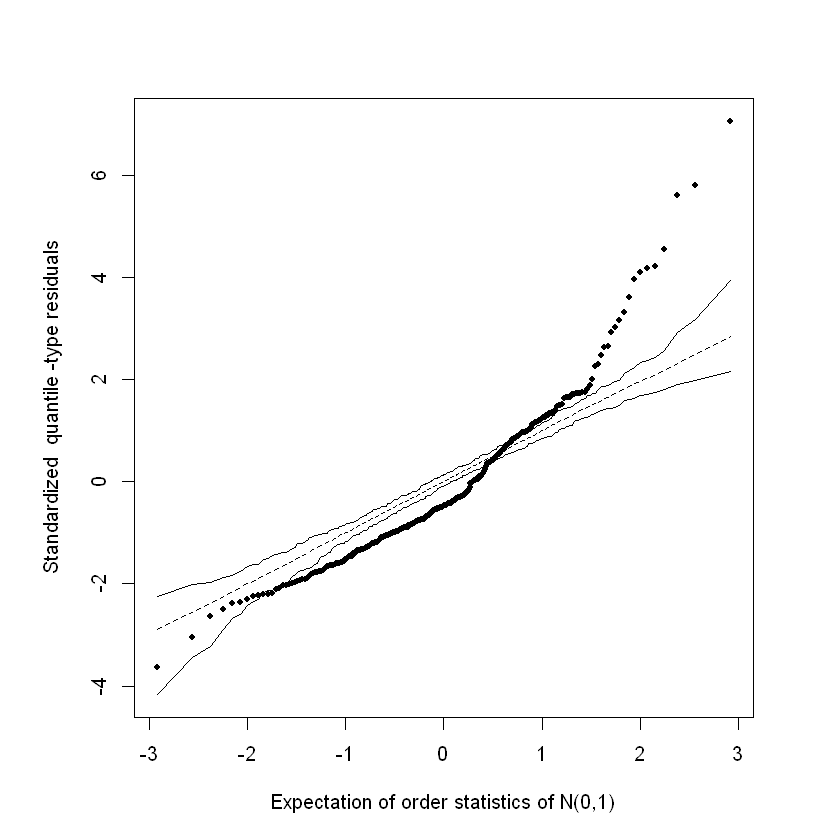

In [44]:
envelope_glm(fit11,rep=100)

* Al realizar el envelope en este ajuste se puede observar que el modelo **fit11** no es el más adecuado. Se puede observar que los residuos positivos se encuentran por encima del 0, estos residuos se encuentran por encima de la banda y nos residuos negativos debajo de la banda.

* En este patrón en el envelope y las estimaciones del desvio/gl y pearson/gl da indicios de algo que se le denomina **sobredispersión**.

* A continuación se realiza el ajuste a un modelo binomial negativo por medio de la función **overglm**=sobredispersion igualmente mediante las fuinciones de enlace los, identidad y raiz cuadrada.

## Otra forma de atacar el problema BinomialNegativaI

In [45]:
###################### Estimación del modelo ######################
fit21 <-  overglm(ninfec ~ habito + local + fetaria + sexo, family="nb1(log)", data=recrutas)
fit22 <-  overglm(ninfec ~ habito + local + fetaria + sexo, family="nb1(identity)", data=recrutas)
fit23 <-  overglm(ninfec ~ habito + local + fetaria + sexo, family="nb1(sqrt)", data=recrutas)
AIC(fit21,fit22,fit23)
BIC(fit21,fit22,fit23)

Warning message in log(mu * phi):
"Se han producido NaNs"Warning message in log(mu * phi + 1):
"Se han producido NaNs"Warning message in log(mu * phi):
"Se han producido NaNs"



  Family:  Negative Binomial I 
Predictor:  1 + habito + local + fetaria + sexo 

 Object     Link -2*log-likelihood df     AIC 
  fit21      log          890.6900  7 904.6900
  fit22 identity          891.6108  7 905.6108
  fit23     sqrt          890.8430  7 904.8430


  Family:  Negative Binomial I 
Predictor:  1 + habito + local + fetaria + sexo 

 Object     Link -2*log-likelihood df     BIC 
  fit21      log          890.6900  7 930.3064
  fit22 identity          891.6108  7 931.2271
  fit23     sqrt          890.8430  7 930.4594


En la anterior salida se muestra los ajustes con sus respectivas funciones de enlace, BIC, AIC, etc. Donde se puede ver eu ela mejor opcion es el modelo con funcion de enlace *log*, Es decir fit21

* Aqui los grados de libertad son 7 puesto que en el modelo Poisson $\phi$ era conocido y era $\phi=1$


In [46]:
summary(fit21)


Sample size:  287 
     Family:  Negative Binomial I
       Link:  log
 *************************************************************
              Estimate Std.Error  z-value  Pr(>|z|)
(Intercept)   -0.06082   0.22459 -0.27081 0.7865401
habitoOccas    0.60305   0.19059  3.16413 0.0015555
localNonBeach  0.54554   0.20287  2.68919 0.0071626
fetaria20-24  -0.42924   0.23299 -1.84230 0.0654307
fetaria25-29  -0.26250   0.24008 -1.09340 0.2742168
sexoMale      -0.14002   0.21034 -0.66568 0.5056185

              Estimate Std.Error
Dispersion     1.73618   0.27213
 *************************************************************
                 -2*log-likelihood:  890.69 
                               AIC:  904.69 
                               BIC:  930.306 


Comparando con los parámetros de la Poisson con respecto a la Binomial Negativa, se logra observar que los parámetros no cambian tanto sin embargo son menores. en cuanto a los errores estandar de la Poisson son: 0,13 - 0,1 - 0.1 - 0.12- 0.13 -0.11 es decir que se estaban subestimando (en realidad eran mayores. En cuanto a la significancia la franja etarea ya no es significativa al 5%.

**Conclusión:** Los que nadan ocasionalmente tienen un número esperado de infecciones de oido mayor a los que nadan frecuentemente y los que no nadan en la playa tienen un numero esperado de infeccion superior a los que nadan en la playa.?

---

### Test

Para verificar si en realidad la *franja etarea* y *sexo* son significativos, es decir:

$$H_o: \beta_4 = \beta_5 = \beta_6= 0 \;\;\;\;\;\;\;H_1: \beta_4 \neq \beta_5 \neq \beta_6 \neq0 $$

In [47]:
###################### Test de Wald ######################
fit211 <-  overglm(ninfec ~ habito + local, family="nb1(log)", data=recrutas)
anova_glm(fit211,fit21,test="wald")


  Wald test 

 Model 1:  ninfec ~ habito + local + fetaria + sexo 
 Model 2:  ninfec ~ habito + local 

   Chi    Df   Pr(>Chi)
  3.8493   3     0.2782


In [48]:
###################### Test de score ######################
anova_glm(fit211,fit21,test="score")


  Rao's score test 

 Model 1:  ninfec ~ habito + local + fetaria + sexo 
 Model 2:  ninfec ~ habito + local 

   Chi    Df   Pr(>Chi)
  3.9632   3     0.2655


In [49]:
###################### Test de razón de verosimilitudes ######################
anova_glm(fit211,fit21,test="lrt")


  Likelihood-ratio test 

 Model 1:  ninfec ~ habito + local + fetaria + sexo 
 Model 2:  ninfec ~ habito + local 

   Chi    Df   Pr(>Chi)
  3.8214   3     0.2814


In [50]:
###################### Test gradiente ######################
anova_glm(fit211,fit21,test="gradient")


  Gradient test 

 Model 1:  ninfec ~ habito + local + fetaria + sexo 
 Model 2:  ninfec ~ habito + local 

   Chi    Df   Pr(>Chi)
  3.7811   3     0.2861


## Otra forma a subdispersión es BinomialNegativa II

In [51]:
fit31 <-  overglm(ninfec ~ habito + local + fetaria + sexo, family="nb2(log)", data=recrutas)
fit32 <-  overglm(ninfec ~ habito + local + fetaria + sexo, family="nb2(identity)", data=recrutas)
fit33 <-  overglm(ninfec ~ habito + local + fetaria + sexo, family="nb2(sqrt)", data=recrutas)
AIC(fit31,fit32,fit33)
BIC(fit31,fit32,fit33)



  Family:  Negative Binomial II 
Predictor:  1 + habito + local + fetaria + sexo 

 Object     Link -2*log-likelihood df     AIC 
  fit31      log          893.2357  7 907.2357
  fit32 identity          893.8798  7 907.8798
  fit33     sqrt          893.4959  7 907.4959


  Family:  Negative Binomial II 
Predictor:  1 + habito + local + fetaria + sexo 

 Object     Link -2*log-likelihood df     BIC 
  fit31      log          893.2357  7 932.8521
  fit32 identity          893.8798  7 933.4961
  fit33     sqrt          893.4959  7 933.1123


Aquí el mejor modelo es el binomial NegativoII enlace log

## Otra forma a subdispersión es PoissonNormalInversa

In [55]:
fit41 <-  overglm(ninfec ~ habito + local + fetaria + sexo, family="poig(log)", data=recrutas)
fit42 <-  overglm(ninfec ~ habito + local + fetaria + sexo, family="poig(identity)", data=recrutas)
fit43 <-  overglm(ninfec ~ habito + local + fetaria + sexo, family="poig(sqrt)", data=recrutas)
AIC(fit41,fit42,fit43)
BIC(fit41,fit42,fit43)



  Family:  Poisson-Inverse.Gaussian 
Predictor:  1 + habito + local + fetaria + sexo 

 Object     Link -2*log-likelihood df     AIC 
  fit41      log          1032.977  7 1046.977
  fit42 identity          1033.568  7 1047.568
  fit43     sqrt          1033.163  7 1047.163


  Family:  Poisson-Inverse.Gaussian 
Predictor:  1 + habito + local + fetaria + sexo 

 Object     Link -2*log-likelihood df     BIC 
  fit41      log          1032.977  7 1072.593
  fit42 identity          1033.568  7 1073.185
  fit43     sqrt          1033.163  7 1072.779


Auí el mejor modelo es el PoissonNormalInverso enlace log.

---

Para poder determinar el mejor modelo, se realiza el AIC,BIC de las cuatro formas de subdispersión:

In [53]:
AIC(fit21,fit31,fit41,fit11)
BIC(fit21,fit31,fit41,fit11)


     Link:  log 
Predictor:  1 + habito + local + fetaria + sexo 

 Object                   Family -2*log-likelihood df      AIC 
  fit21      Negative Binomial I          890.6900  7  904.6900
  fit31     Negative Binomial II          893.2357  7  907.2357
  fit41 Poisson-Inverse.Gaussian         1032.9766  7 1046.9766
  fit11                  Poisson         1127.8280  6 1139.8280

     Link:  log 
Predictor:  1 + habito + local + fetaria + sexo 

 Object                   Family -2*log-likelihood df      BIC 
  fit21      Negative Binomial I          890.6900  7  930.3064
  fit31     Negative Binomial II          893.2357  7  932.8521
  fit41 Poisson-Inverse.Gaussian         1032.9766  7 1072.5929
  fit11                  Poisson         1127.8280  6 1161.7849


Finalmente se tiene que el mejor modelo es el que está determinadpo por Negative Binomial I con funcion de enlace log. veamos el ajuste:

In [56]:
summary(fit21)


Sample size:  287 
     Family:  Negative Binomial I
       Link:  log
 *************************************************************
              Estimate Std.Error  z-value  Pr(>|z|)
(Intercept)   -0.06082   0.22459 -0.27081 0.7865401
habitoOccas    0.60305   0.19059  3.16413 0.0015555
localNonBeach  0.54554   0.20287  2.68919 0.0071626
fetaria20-24  -0.42924   0.23299 -1.84230 0.0654307
fetaria25-29  -0.26250   0.24008 -1.09340 0.2742168
sexoMale      -0.14002   0.21034 -0.66568 0.5056185

              Estimate Std.Error
Dispersion     1.73618   0.27213
 *************************************************************
                 -2*log-likelihood:  890.69 
                               AIC:  904.69 
                               BIC:  930.306 


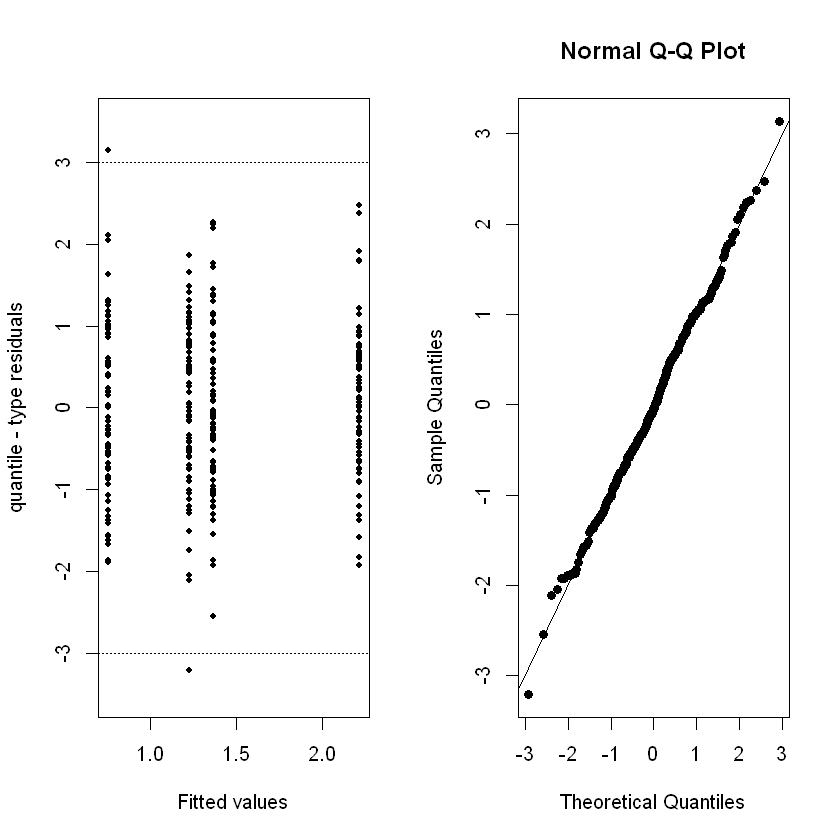

In [57]:
################################# Diagnóstico del modelo seleccionado #################################
###################### Análisis de residuos ######################
par(mfrow=c(1,2))
res <- residuals(fit211,plot=TRUE,type="quantile",identify=1)
qqnorm(res,pch=16)
abline(0,1)

Para este caso no se tiene el envelope, sin embargo se tienen los residuos cuantil y estos deben distribuir normal(0,1) cuando son corresctos.

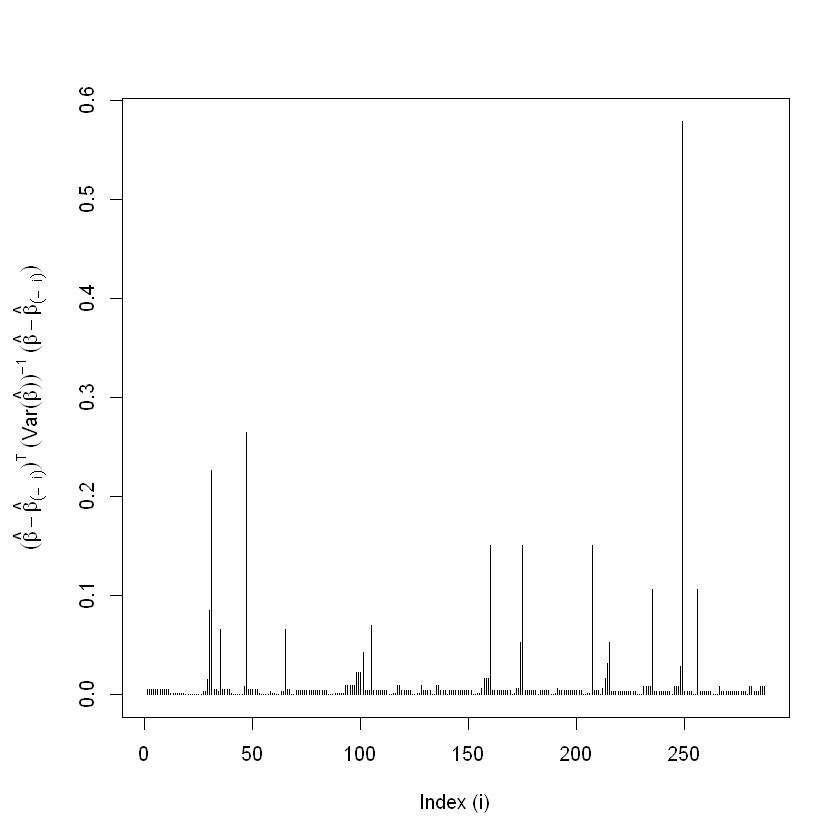

In [58]:
###################### Análisis de sensibilidad ######################
CookDistance(fit211,plot=TRUE,out=FALSE,identify=1)

In [59]:
###################### Intervalos de confianza ######################
ci_glm(fit211)


 Approximate 95 percent confidence intervals based on the Wald test 

              Lower limit Upper limit
(Intercept)      -0.61460      0.0593
habitoOccas       0.21651      0.9639
localNonBeach     0.10886      0.8538
Dispersion        1.31631      2.4222


## NOTA:   

Para instalar librerias de R en jupyter notebooks usamos la siguiente linea 

* install.packages("ISLR", "/home/user/anaconda3/lib/R/library")  no usar este comando
* install.packages("sm", "/Users/YULY/anaconda/Lib/R/library")

Para más información verificar el siguiente enlace::

https://www.pythond.com/23094/conda-como-instalar-paquetes-r-que-no-estan-disponibles-en-r-essentials.html

* También puede usarse el siguiente comando desde r para instalar el entorno de r 

install.packages("CASdatasets", "/Users/YULY/anaconda/Lib/R/library",repos = "http://cas.uqam.ca/pub/R/")
